In [187]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  
#pd.set_option('display.expand_frame_repr', False)
#pd.set_option('max_colwidth', -1)

from sklearn import tree

In [188]:
df_prospective = pd.read_excel('H:\RediMinds\DRMahen/VCQI_PN_2014-Jun2018.xlsx', sheet_name='Prospective')

In [189]:
df_retro = pd.read_excel('H:\RediMinds\DRMahen/VCQI_PN_2014-Jun2018.xlsx', sheet_name='Retro')

In [190]:
#checking shape of dataframe
df_prospective.shape

(921, 161)

In [191]:
#checking shape of dataframe 
df_retro.shape

(2391, 161)

In [192]:
df_prospective['data_record'] = 'prospective' 

In [193]:
df_retro['data_record'] = 'retro' 

In [194]:
df = df_prospective.append(df_retro)

In [195]:
df.shape

(3312, 162)

In [196]:
df.head(10)

,PATIENT NUMBER,PROC NAME,CENTER CODE,SURGEON CODE,REC PROGRESS,CREATED DATE,GENDER,DATE OF BIRTH,AGE AT SURGERY,MARITAL STATUS,RACE,EDUCATION,WEIGHT,HEIGHT,BMI,CLINICAL SIZE (mm),ECOG,CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,SYMPTOMS,SOLITARY KIDNEY,TYPE OF SOLITARY KIDNEY,BILATERALITY OF TUMOR,SIDE OF TUMOR,SIDE OF SURGERY,PRE-OP MULTIFOCALITY,FACE,TUMOR lOCATION,PRE-OP HB,PRE-OP HT,PRE-OP WBC,PRE-OP CREAT,PRE-OP GFR,PRE-OP EGFR,PRE-OP Split Renal Function,PRE-OP ERPF,PADUA SCORE,PADUA RISK,POLAR LOCATION,RIM LOCATION,RENAL SINUS,UCS INVASION,EXOPHYTIC RATE,CLINICAL SIZE GROUP,CT,CN,CM,R.E.N.A.L. NEPHRO SCORE,R.E.N.A.L. NEPHRO RISK STRATIFICATION,RADIUS (maximal diameter in cm),EXOPHYTIC/ENDOPHYTIC PROPERTIES,NEARNESS OF TUMOUR,ANTERIOR OR POSTERIOR,LOCATION TO POLAR LINE,Tumor Consistency on Imaging,Bosniak Classification,DATE OF SURGERY,ASA SCORE,PARTIAL NEPHRO INDICATION,MULTIFOCALITY,NO OF LESIONS,Imaging Features of other excised tumor,Consistency of the other excised tumor/s,ACCESS,DA VINCI MODEL,ROBOTICS ARMS,ASSISTENT TROCARS,DUAL CONSOLE,PRIMARY SURGEON,OPERATIVE TIME(min),ISCHEMIA,CLAMP ARTERY,SELECTIVE ARTERIAL CLAMPING,CLAMP VEIN,EARLY UNCLAMPING,FLUORESCENCE,INNER RENORRHAPHY,OUTER RENORRHAPHY,ISCHEMIA TIME (min),UCS REPAIR,HAEMOSTATIC AGENTS,HAEMOSTATIC Details,LYMPH NODE DISSECTION(LND),BLOOD LOSS (ml),INTRA-OP TRANSUFUSION,SURGICAL CONSIDERATIONS,INTRA-OP COMPLICATION,INTRA-OP COMPLICATIONS,Need to Convert to Radical Nephrectomy,TREATMENT OF COMPLICATION,POST-OP COMPLICATION,SURGICAL COMPLICATIONS,NON SURGICAL COMPLICATIONS,POST-OP TREATMENT OF COMPLICATION,CLAVIEN GRADE,POST-OP HB_Day 1,POST-OP HT_Day 1,POST-OP Creat_Day 1,POST-OP EGFR_Day 1,POST-OP WBC_Day 1,POST-OP HB_Day 2,POST-OP HT_Day 2,POST-OP Creat_Day 2,POST-OP EGFR_Day 2,POST-OP WBC_Day 2,POST-OP HB_Day 3,POST-OP HT_Day 3,POST-OP Creat_Day 3,POST-OP EGFR_Day 3,POST-OP WBC_Day 3,LENGTH OF STAY (days),PATHOLOGICAL TUMOR SIZE,MIN THICKNESS MARGIN,MAX THICKNESS MARGIN,MULITIFOCALITY,PATHOLOGY,HYSTOTYPE MALIGNANAT,HYSTOTYPE MALIGNANAT YES,HYSTOTYPE BENIGN,HYSTOTYPE BENIGN YES,FUHRMAN GRADING,SARCOMATOID DIFF,%SARCOMATOID DIFF,NECROSIS,MICRO VENOUS INVASION,UCS INVASION.1,PERIRENAL FAT INVASION,Hilar Fat Invasion,SINUS FAT INVASION,MIC SCORE,ADRENAL INVASION,GEROTA INVASION,Renal Vein Invasion,VENOUS THROMBUS,SURGICAL MARGIN,UNIFOCAL/MULTIFOCAL,NO_OF_NODE_TAKEN,NO_OF_NODE_POSITIVE,SITE OF POSITIVE NODE,TREATMENT PSM,PT,PN,OTHER TUMORS,DATE OF RECURRENCE,LAST FOLLOW UP DURATION,TIME TO RECURRENCE,LAST FOLLOW UP STATUS,LAST FOLLOW UP RECURRENCE,LAST TREATMENT OF RECURRENCE,TYPE OF COMPLICATIONS(s),SELECTED SURGICAL COMPLICATIONS(s),SELECTED NON SURGICAL COMPLICATIONS(s),TREATMENT OF COMPLICATIONS(s),RECURRENCE(s),FOLLOW UP DATE(s),STATUS(s),TREATMENT(s),CREATININE(s),EGFR(s),SRF(s),ERPF(s),data_record
0,21PAT000148,Partial Nephrectomy,GQHLD5Q4,CWQW6ZDS,Follow-up1,2017-09-24 18:30:00.0,Female,1967.0,50.0,Married,Others,Graduate,57.00,168.0,20.20,7.0,"Fully active, able to carry on all pre-disease...",0.0,2.0,Absent,No,NaN,No,Left,Left,No,Posterior,Lower Pole,13.2,50,7800,0.63,67.7,100.030000,50,168.5,12.0,3(High Risk),Tumours entirely located above the upper or be...,At the medial rim (2 points),With renal sinus involvement (2 points),"With involving, dislocation or infiltration of...",< 50%exophytic (2 points),=>7cm,T2a,Nx,Not Applicable,11x,3(High Risk),=>7,<50%,=<4,Neither(x),3.0,Entirely solid,Entirely solid tumor,2017-09-24 00:00:00.0,Category 1,Elective,No,1.0,NP,Entirely solid tumor,Transperitoneal,Xi,4-arms,5 mm + 12 mm,No,Staff,3:40,Warm,Satinsky Clamp,No,Satinsky Clamp,No,Not Used,Yes,Yes,24,Performed,Yes,Surgicel+surgiflo,Not Performed,600,1 Unit,NaN,Yes,"180,310",No,NaN,No Complications,NaN,NaN,NaN,Grade 0: Absence of any complication,9.5,28.8,0.8,75.7,14600,999.0,999.0,999,999,999,999.0,999.0,999.00,999,999,5.0,8.5,0.4,0.4,Absent,Benign,No,NaN,Yes,Angiomyolipoma,999,Absent,0.0,Absent,Absent,Absent,Absent,Absent,Absent,0.0,Absent,Absent,Absent,A

In [197]:
df.describe()

,DATE OF BIRTH,AGE AT SURGERY,WEIGHT,HEIGHT,BMI,CLINICAL SIZE (mm),CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,PRE-OP CREAT,PRE-OP EGFR,PADUA SCORE,LOCATION TO POLAR LINE,NO OF LESIONS,POST-OP HB_Day 2,POST-OP HT_Day 2,POST-OP HB_Day 3,POST-OP HT_Day 3,POST-OP Creat_Day 3,LENGTH OF STAY (days),PATHOLOGICAL TUMOR SIZE,MIN THICKNESS MARGIN,MAX THICKNESS MARGIN,%SARCOMATOID DIFF,MIC SCORE,LAST FOLLOW UP DURATION
count,1919.00000,3294.000000,2327.000000,2289.00000,2958.000000,3122.000000,2737.000000,2702.000000,3264.000000,2569.000000,2123.000000,1944.000000,2678.000000,1114.000000,1154.000000,986.000000,996.000000,1199.000000,3067.000000,2781.000000,1664.000000,974.000000,1365.000000,2290.000000,1923.000000
mean,1955.81136,57.843655,90.291609,161.08460,28.906286,43.947341,1.522835,3.541451,6.943323,80.452488,8.404145,1.899177,1.053771,335.618887,349.216124,468.772809,509.636336,376.595229,3.161722,11.626124,274.839844,690.035421,14.015385,0.297817,16.916485
std,13.14144,12.702301,40.666559,29.14078,8.013751,333.125372,1.916268,2.199328,76.017258,24.170568,1.748467,0.822433,0.266591,458.270906,456.519416,490.323768,484.899641,483.504763,2.479386,40.328840,2490.582220,3321.287384,154.822902,0.457398,19.503374
min,1921.00000,0.000000,7.711150,51.00000,2.320000,0.000000,0.000000,0.000000,0.000000,0.266354,2.000000,1.000000,0.000000,1.330000,0.204000,0.300000,0.284000,0.270000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,-0.800000
25%,1946.00000,49.000000,69.000000,160.00000,24.610000,21.000000,0.000000,2.000000,0.780000,65.720000,7.000000,1.000000,1.000000,11.300000,31.800000,11.500000,33.075000,1.000000,2.000000,2.400000,1.000000,3.625000,0.000000,0.000000,3.000000
50%,1955.00000,59.000000,80.000000,169.00000,27.700000,30.000000,1.000000,3.000000,0.910000,79.572342,8.000000,2.000000,1.000000,13.000000,37.000000,14.350000,45.500000,1.400000,3.000000,3.500000,3.000000,999.000000,0.000000,0.000000,10.000000
75%,1965.00000,67.000000,94.750000,176.00000,31.910000,42.000000,2.000000,5.000000,1.100000,94.000000,10.000000,3.000000,1.000000,999.000000,999.000000,999.000000,999.000000,999.000000,4.000000,7.300000,11.000000,999.000000,0.000000,1.000000,24.000000
max,2015.00000,89.000000,377.000000,208.30000,304.000000,18200.000000,19.000000,14.000000,999.000000,253.971416,14.000000,3.000000,5.000000,999.000000,999.000000,999.000000,999.000000,999.000000,51.000000,999.000000,99999.000000,99999.000000,999.000000,1.000000,101.000000


In [198]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3312 entries, 0 to 2390
Data columns (total 162 columns):
PATIENT NUMBER                              3312 non-null object
PROC NAME                                   3312 non-null object
CENTER CODE                                 3312 non-null object
SURGEON CODE                                921 non-null object
REC PROGRESS                                3312 non-null object
CREATED DATE                                3312 non-null object
GENDER                                      3302 non-null object
DATE OF BIRTH                               1919 non-null float64
AGE AT SURGERY                              3294 non-null float64
MARITAL STATUS                              2080 non-null object
RACE                                        2016 non-null object
EDUCATION                                   1843 non-null object
WEIGHT                                      2327 non-null float64
HEIGHT                                      2

In [199]:
numeric_col_list = [
 'PRE-OP HB',
 'PRE-OP HT',
 'PRE-OP WBC',
 'PRE-OP CREAT',
 'PRE-OP GFR',
 'PRE-OP EGFR',
 'PRE-OP Split Renal Function',
 'PRE-OP ERPF',
 'PADUA SCORE',

 'NO OF LESIONS',
 'POST-OP HB_Day 1',
 'POST-OP HT_Day 1',
 'POST-OP Creat_Day 1',
 'POST-OP EGFR_Day 1',
 'POST-OP WBC_Day 1',
 'POST-OP HB_Day 2',
 'POST-OP HT_Day 2',
 'POST-OP Creat_Day 2',
 'POST-OP EGFR_Day 2',
 'POST-OP WBC_Day 2',
 'POST-OP HB_Day 3',
 'POST-OP HT_Day 3',
 'POST-OP Creat_Day 3',
 'POST-OP EGFR_Day 3',
 'POST-OP WBC_Day 3',
 'LENGTH OF STAY (days)',
 'PATHOLOGICAL TUMOR SIZE',
 'MIN THICKNESS MARGIN',
 'MAX THICKNESS MARGIN',
 'FUHRMAN GRADING',
'BLOOD LOSS (ml)',
'R.E.N.A.L. NEPHRO SCORE',
'OPERATIVE TIME(min)',
'ISCHEMIA TIME (min)',
] 
numeric_col_list

['PRE-OP HB',
 'PRE-OP HT',
 'PRE-OP WBC',
 'PRE-OP CREAT',
 'PRE-OP GFR',
 'PRE-OP EGFR',
 'PRE-OP Split Renal Function',
 'PRE-OP ERPF',
 'PADUA SCORE',
 'NO OF LESIONS',
 'POST-OP HB_Day 1',
 'POST-OP HT_Day 1',
 'POST-OP Creat_Day 1',
 'POST-OP EGFR_Day 1',
 'POST-OP WBC_Day 1',
 'POST-OP HB_Day 2',
 'POST-OP HT_Day 2',
 'POST-OP Creat_Day 2',
 'POST-OP EGFR_Day 2',
 'POST-OP WBC_Day 2',
 'POST-OP HB_Day 3',
 'POST-OP HT_Day 3',
 'POST-OP Creat_Day 3',
 'POST-OP EGFR_Day 3',
 'POST-OP WBC_Day 3',
 'LENGTH OF STAY (days)',
 'PATHOLOGICAL TUMOR SIZE',
 'MIN THICKNESS MARGIN',
 'MAX THICKNESS MARGIN',
 'FUHRMAN GRADING',
 'BLOOD LOSS (ml)',
 'R.E.N.A.L. NEPHRO SCORE',
 'OPERATIVE TIME(min)',
 'ISCHEMIA TIME (min)']

In [200]:
for col in numeric_col_list:
    df[col]= pd.to_numeric(df[col], errors='coerce')

In [201]:
df.describe().round(2)

,DATE OF BIRTH,AGE AT SURGERY,WEIGHT,HEIGHT,BMI,CLINICAL SIZE (mm),CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,PRE-OP HB,PRE-OP HT,PRE-OP WBC,PRE-OP CREAT,PRE-OP GFR,PRE-OP EGFR,PRE-OP Split Renal Function,PRE-OP ERPF,PADUA SCORE,R.E.N.A.L. NEPHRO SCORE,LOCATION TO POLAR LINE,NO OF LESIONS,OPERATIVE TIME(min),ISCHEMIA TIME (min),BLOOD LOSS (ml),POST-OP HB_Day 1,POST-OP HT_Day 1,POST-OP Creat_Day 1,POST-OP EGFR_Day 1,POST-OP WBC_Day 1,POST-OP HB_Day 2,POST-OP HT_Day 2,POST-OP Creat_Day 2,POST-OP EGFR_Day 2,POST-OP WBC_Day 2,POST-OP HB_Day 3,POST-OP HT_Day 3,POST-OP Creat_Day 3,POST-OP EGFR_Day 3,POST-OP WBC_Day 3,LENGTH OF STAY (days),PATHOLOGICAL TUMOR SIZE,MIN THICKNESS MARGIN,MAX THICKNESS MARGIN,FUHRMAN GRADING,%SARCOMATOID DIFF,MIC SCORE,LAST FOLLOW UP DURATION
count,1919.00,3294.00,2327.00,2289.00,2958.00,3122.00,2737.00,2702.00,2503.00,2375.00,2036.00,3264.00,742.00,2569.00,431.00,407.00,2123.00,1748.00,1944.00,2678.00,2145.00,2952.00,3167.00,1854.00,2003.00,2915.00,2369.00,1503.00,1114.00,1154.00,1339.00,1111.00,1102.00,986.00,996.00,1199.00,936.00,982.00,3067.00,2781.00,1664.00,974.00,2467.00,1365.00,2290.00,1923.00
mean,1955.81,57.84,90.29,161.08,28.91,43.95,1.52,3.54,27.54,53.16,2893.94,6.94,283.98,80.45,721.53,801.42,8.40,6.84,1.90,1.05,190.19,22.84,187.34,88.98,65.77,28.09,182.93,3200.02,335.62,349.22,266.15,443.62,3088.59,468.77,509.64,376.60,564.26,2669.21,3.16,11.63,274.84,690.04,76.10,14.02,0.30,16.92
std,13.14,12.70,40.67,29.14,8.01,333.13,1.92,2.20,115.72,126.12,3848.07,76.02,389.24,24.17,430.00,359.65,1.75,1.85,0.82,0.27,101.79,63.23,277.99,252.48,179.36,161.09,309.10,5536.25,458.27,456.52,440.39,459.35,5519.57,490.32,484.90,483.50,465.12,3893.59,2.48,40.33,2490.58,3321.29,261.29,154.82,0.46,19.50
min,1921.00,0.00,7.71,51.00,2.32,0.00,0.00,0.00,0.50,0.25,2.70,0.00,0.60,0.27,20.70,38.30,2.00,2.00,1.00,0.00,3.00,0.00,0.00,1.00,0.25,0.00,1.26,0.00,1.33,0.20,0.45,11.00,2.10,0.30,0.28,0.27,10.00,2.00,0.00,0.00,0.00,0.00,1.00,-999.00,0.00,-0.80
25%,1946.00,49.00,69.00,160.00,24.61,21.00,0.00,2.00,12.80,36.30,6.76,0.78,60.00,65.72,100.00,999.00,7.00,5.00,1.00,1.00,140.00,14.00,50.00,11.10,31.25,0.95,54.01,9.90,11.30,31.80,1.00,58.60,11.10,11.50,33.08,1.00,69.00,13.45,2.00,2.40,1.00,3.62,2.00,0.00,0.00,3.00
50%,1955.00,59.00,80.00,169.00,27.70,30.00,1.00,3.00,13.90,41.00,10.40,0.91,82.45,79.57,999.00,999.00,8.00,7.00,2.00,1.00,177.00,18.00,100.00,12.30,35.40,1.00,69.00,14.10,13.00,37.00,1.30,86.00,999.00,14.35,45.50,1.40,999.00,999.00,3.00,3.50,3.00,999.00,2.00,0.00,0.00,10.00
75%,1965.00,67.00,94.75,176.00,31.91,42.00,2.00,5.00,14.90,44.00,6400.00,1.10,130.32,94.00,999.00,999.00,10.00,8.00,3.00,1.00,218.00,23.00,200.00,13.80,38.90,1.32,88.50,7112.00,999.00,999.00,999.00,999.00,5100.00,999.00,999.00,999.00,999.00,999.00,4.00,7.30,11.00,999.00,3.00,0.00,1.00,24.00
max,2015.00,89.00,377.00,208.30,304.00,18200.00,19.00,14.00,999.00,999.00,25510.00,999.00,999.00,253.97,999.00,999.00,14.00,12.00,3.00,5.00,999.00,999.00,9650.00,999.00,999.00,999.00,999.00,107000.00,999.00,999.00,999.00,999.00,105303.00,999.00,999.00,999.00,999.00,25340.00,51.00,999.00,99999.00,99999.00,999.00,999.00,1.00,101.00


In [202]:
#replace default missing values such as 999 in the dataframe with NaN
df = df.replace([99,999,9999,99999,999999],np.nan)


In [203]:
df.describe().round(2)

,DATE OF BIRTH,AGE AT SURGERY,WEIGHT,HEIGHT,BMI,CLINICAL SIZE (mm),CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,PRE-OP HB,PRE-OP HT,PRE-OP WBC,PRE-OP CREAT,PRE-OP GFR,PRE-OP EGFR,PRE-OP Split Renal Function,PRE-OP ERPF,PADUA SCORE,R.E.N.A.L. NEPHRO SCORE,LOCATION TO POLAR LINE,NO OF LESIONS,OPERATIVE TIME(min),ISCHEMIA TIME (min),BLOOD LOSS (ml),POST-OP HB_Day 1,POST-OP HT_Day 1,POST-OP Creat_Day 1,POST-OP EGFR_Day 1,POST-OP WBC_Day 1,POST-OP HB_Day 2,POST-OP HT_Day 2,POST-OP Creat_Day 2,POST-OP EGFR_Day 2,POST-OP WBC_Day 2,POST-OP HB_Day 3,POST-OP HT_Day 3,POST-OP Creat_Day 3,POST-OP EGFR_Day 3,POST-OP WBC_Day 3,LENGTH OF STAY (days),PATHOLOGICAL TUMOR SIZE,MIN THICKNESS MARGIN,MAX THICKNESS MARGIN,FUHRMAN GRADING,%SARCOMATOID DIFF,MIC SCORE,LAST FOLLOW UP DURATION
count,1919.00,3294.00,2323.00,2289.00,2958.00,3107.00,2737.00,2702.00,2468.00,2334.00,1990.00,3245.00,573.00,2555.00,127.00,95.00,2123.00,1748.00,1944.00,2678.00,2122.00,2940.00,3167.00,1722.00,1932.00,2836.00,2069.00,1326.00,755.00,773.00,984.00,657.00,732.00,532.00,503.00,748.00,436.00,518.00,3067.00,2777.0,1319.00,468.00,2284.00,1338.00,2290.00,1923.00
mean,1955.81,57.84,90.28,161.08,28.91,39.34,1.52,3.54,13.76,36.54,2937.75,1.13,73.09,80.35,57.35,152.51,8.40,6.84,1.90,1.05,182.27,18.86,187.34,19.75,31.48,1.36,66.34,3495.18,20.18,28.95,1.76,65.32,4146.04,16.29,30.00,1.32,67.76,4165.31,3.16,10.2,4.23,11.75,2.16,-5.19,0.30,16.92
std,13.14,12.70,40.70,29.14,8.01,327.23,1.92,2.20,1.80,13.66,3881.38,3.80,25.83,24.20,25.01,59.61,1.75,1.85,0.82,0.27,62.65,10.39,277.99,28.36,12.40,4.59,21.67,5831.20,29.01,13.61,7.48,37.22,6523.04,21.66,18.67,3.98,24.90,4900.99,2.48,14.9,10.75,49.46,0.67,72.20,0.46,19.50
min,1921.00,0.00,7.71,51.00,2.32,0.00,0.00,0.00,0.50,0.25,2.70,0.00,0.60,0.27,20.70,38.30,2.00,2.00,1.00,0.00,3.00,0.00,0.00,1.00,0.25,0.00,1.26,0.00,1.33,0.20,0.45,11.00,2.10,0.30,0.28,0.27,10.00,2.00,0.00,0.0,0.00,0.00,1.00,-999.00,0.00,-0.80
25%,1946.00,49.00,69.00,160.00,24.61,21.00,0.00,2.00,12.80,36.12,6.70,0.78,60.00,65.52,41.00,110.00,7.00,5.00,1.00,1.00,140.00,14.00,50.00,11.00,31.00,0.94,51.87,9.50,10.80,28.10,0.90,48.46,9.88,10.38,28.50,0.87,51.53,8.90,2.00,2.4,1.00,1.20,2.00,0.00,0.00,3.00
50%,1955.00,59.00,80.00,169.00,27.70,30.00,1.00,3.00,13.90,40.80,10.00,0.91,68.00,79.32,48.00,140.50,8.00,7.00,2.00,1.00,176.00,18.00,100.00,12.10,35.10,1.00,64.80,12.58,12.00,33.70,1.10,63.00,14.00,11.80,33.10,1.07,67.00,15.40,3.00,3.5,2.00,3.00,2.00,0.00,0.00,10.00
75%,1965.00,67.00,94.27,176.00,31.91,42.00,2.00,5.00,14.90,44.00,6500.00,1.10,89.00,93.71,58.75,197.22,10.00,8.00,3.00,1.00,215.00,23.00,200.00,13.30,38.40,1.30,79.11,8090.00,13.00,37.10,1.40,80.79,8800.00,12.80,37.00,1.28,81.53,8623.50,4.00,7.2,4.00,8.00,3.00,0.00,1.00,24.00
max,2015.00,89.00,377.00,208.30,304.00,18200.00,19.00,14.00,39.60,88.00,25510.00,109.00,213.40,253.97,100.00,340.00,14.00,12.00,3.00,5.00,608.00,320.00,9650.00,162.00,88.00,143.00,198.38,107000.00,152.00,50.00,174.00,811.00,105303.00,131.00,332.00,109.00,174.10,25340.00,51.00,115.0,240.00,979.00,4.00,70.00,1.00,101.00


In [204]:
# replacing negative numbers in the dataframe with nan
for col in list(df.select_dtypes('float64')):
    df[col] = df[col].apply(lambda x: np.nan if x<0 else x)

In [205]:
# if the value of PRE-OP WBC value contains is less the 4 digits then multiply it by 1000
df['PRE-OP WBC'] = df['PRE-OP WBC'].apply(lambda x: x*1000 if len(str(round(x,2))) <6 else x)

# if the value of POST-OP WBC_Day 1 value contains is less the 4 digits then multiply it by 1000
df['POST-OP WBC_Day 1'] = df['POST-OP WBC_Day 1'].apply(lambda x: x*1000 if len(str(round(x,2))) <6 else x)

# if the value of POST-OP WBC_Day 2 value contains is less the 4 digits then multiply it by 1000
df['POST-OP WBC_Day 2'] = df['POST-OP WBC_Day 2'].apply(lambda x: x*1000 if len(str(round(x,2))) <6 else x)

# if the value of POST-OP WBC_Day 2 value contains is less the 4 digits then multiply it by 1000
df['POST-OP WBC_Day 3'] = df['POST-OP WBC_Day 3'].apply(lambda x: x*1000 if len(str(round(x,2))) <6 else x)

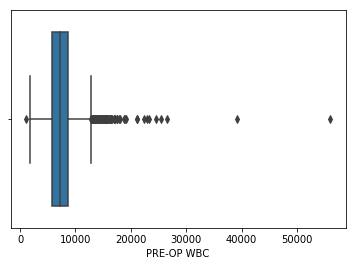

In [206]:
import seaborn as sns
sns.boxplot(x=df['PRE-OP WBC'])

In [207]:
df.describe().round(2)

,DATE OF BIRTH,AGE AT SURGERY,WEIGHT,HEIGHT,BMI,CLINICAL SIZE (mm),CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,PRE-OP HB,PRE-OP HT,PRE-OP WBC,PRE-OP CREAT,PRE-OP GFR,PRE-OP EGFR,PRE-OP Split Renal Function,PRE-OP ERPF,PADUA SCORE,R.E.N.A.L. NEPHRO SCORE,LOCATION TO POLAR LINE,NO OF LESIONS,OPERATIVE TIME(min),ISCHEMIA TIME (min),BLOOD LOSS (ml),POST-OP HB_Day 1,POST-OP HT_Day 1,POST-OP Creat_Day 1,POST-OP EGFR_Day 1,POST-OP WBC_Day 1,POST-OP HB_Day 2,POST-OP HT_Day 2,POST-OP Creat_Day 2,POST-OP EGFR_Day 2,POST-OP WBC_Day 2,POST-OP HB_Day 3,POST-OP HT_Day 3,POST-OP Creat_Day 3,POST-OP EGFR_Day 3,POST-OP WBC_Day 3,LENGTH OF STAY (days),PATHOLOGICAL TUMOR SIZE,MIN THICKNESS MARGIN,MAX THICKNESS MARGIN,FUHRMAN GRADING,%SARCOMATOID DIFF,MIC SCORE,LAST FOLLOW UP DURATION
count,1919.00,3294.00,2323.00,2289.00,2958.00,3107.00,2737.00,2702.00,2468.00,2334.00,1990.00,3245.00,573.00,2555.00,127.00,95.00,2123.00,1748.00,1944.00,2678.00,2122.00,2940.00,3167.00,1722.00,1932.00,2836.00,2069.00,1326.00,755.00,773.00,984.00,657.00,732.00,532.00,503.00,748.00,436.00,518.00,3067.00,2777.0,1319.00,468.00,2284.00,1329.00,2290.00,1920.00
mean,1955.81,57.84,90.28,161.08,28.91,39.34,1.52,3.54,13.76,36.54,7640.82,1.13,73.09,80.35,57.35,152.51,8.40,6.84,1.90,1.05,182.27,18.86,187.34,19.75,31.48,1.36,66.34,10553.41,20.18,28.95,1.76,65.32,10604.04,16.29,30.00,1.32,67.76,9645.79,3.16,10.2,4.23,11.75,2.16,0.13,0.30,16.94
std,13.14,12.70,40.70,29.14,8.01,327.23,1.92,2.20,1.80,13.66,2951.85,3.80,25.83,24.20,25.01,59.61,1.75,1.85,0.82,0.27,62.65,10.39,277.99,28.36,12.40,4.59,21.67,4281.65,29.01,13.61,7.48,37.22,5372.70,21.66,18.67,3.98,24.90,6491.65,2.48,14.9,10.75,49.46,0.67,2.33,0.46,19.51
min,1921.00,0.00,7.71,51.00,2.32,0.00,0.00,0.00,0.50,0.25,1060.00,0.00,0.60,0.27,20.70,38.30,2.00,2.00,1.00,0.00,3.00,0.00,0.00,1.00,0.25,0.00,1.26,0.00,1.33,0.20,0.45,11.00,1260.00,0.30,0.28,0.27,10.00,2000.00,0.00,0.0,0.00,0.00,1.00,0.00,0.00,0.00
25%,1946.00,49.00,69.00,160.00,24.61,21.00,0.00,2.00,12.80,36.12,5800.00,0.78,60.00,65.52,41.00,110.00,7.00,5.00,1.00,1.00,140.00,14.00,50.00,11.00,31.00,0.94,51.87,8400.00,10.80,28.10,0.90,48.46,8200.00,10.38,28.50,0.87,51.53,7500.00,2.00,2.4,1.00,1.20,2.00,0.00,0.00,3.00
50%,1955.00,59.00,80.00,169.00,27.70,30.00,1.00,3.00,13.90,40.80,7200.00,0.91,68.00,79.32,48.00,140.50,8.00,7.00,2.00,1.00,176.00,18.00,100.00,12.10,35.10,1.00,64.80,10100.00,12.00,33.70,1.10,63.00,10000.00,11.80,33.10,1.07,67.00,8950.00,3.00,3.5,2.00,3.00,2.00,0.00,0.00,10.00
75%,1965.00,67.00,94.27,176.00,31.91,42.00,2.00,5.00,14.90,44.00,8600.00,1.10,89.00,93.71,58.75,197.22,10.00,8.00,3.00,1.00,215.00,23.00,200.00,13.30,38.40,1.30,79.11,12300.00,13.00,37.10,1.40,80.79,12000.00,12.80,37.00,1.28,81.53,10800.00,4.00,7.2,4.00,8.00,3.00,0.00,1.00,24.00
max,2015.00,89.00,377.00,208.30,304.00,18200.00,19.00,14.00,39.60,88.00,56000.00,109.00,213.40,253.97,100.00,340.00,14.00,12.00,3.00,5.00,608.00,320.00,9650.00,162.00,88.00,143.00,198.38,107000.00,152.00,50.00,174.00,811.00,105303.00,131.00,332.00,109.00,174.10,131000.00,51.00,115.0,240.00,979.00,4.00,70.00,1.00,101.00


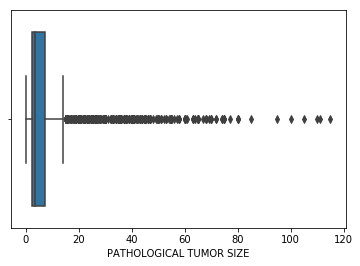

In [208]:
import seaborn as sns
sns.boxplot(x=df['PATHOLOGICAL TUMOR SIZE'])

H:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


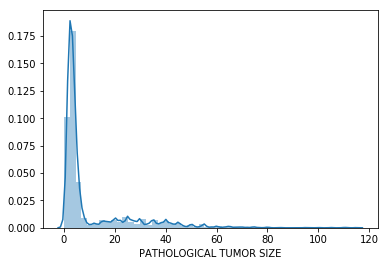

In [209]:
import seaborn as sns
sns.distplot(df['PATHOLOGICAL TUMOR SIZE'].dropna())

In [210]:
df_error = df[(df['AGE AT SURGERY'] == 0) | 
       ((df['WEIGHT']>=100) & (df['HEIGHT']<=140)) | 
       (df['BMI']>50) | (df['BMI']<15) | 
       (df['CLINICAL SIZE (mm)']>150) |
       (df['NO OF LESIONS']==0) |
       (df['PRE-OP HB']<1) |
       (df['PRE-OP HT']<1) |
       (df['PRE-OP CREAT']>10) |
       (df['PRE-OP GFR']<1) |
       (df['PRE-OP EGFR']<1) |
       (df['OPERATIVE TIME(min)']<10) |
       (df['POST-OP HB_Day 1']<1) |
       (df['POST-OP HT_Day 1']<1) |
       (df['POST-OP Creat_Day 1']>10) |
       (df['POST-OP EGFR_Day 1']<1) |
       (df['POST-OP HB_Day 2']<1) |
       (df['POST-OP HT_Day 2']<1) |
       (df['POST-OP Creat_Day 2']>10) |
       (df['POST-OP EGFR_Day 2']<1) |
       (df['POST-OP HB_Day 3']<1) |
       (df['POST-OP HT_Day 3']<1) |
       (df['POST-OP Creat_Day 3']>10) |
       (df['POST-OP EGFR_Day 3']<1) |
       (df['LENGTH OF STAY (days)']==0) 
      ]

In [211]:
df2 = pd.concat([df,df_error]).drop_duplicates(keep=False).copy()

In [212]:
df2.describe()

,DATE OF BIRTH,AGE AT SURGERY,WEIGHT,HEIGHT,BMI,CLINICAL SIZE (mm),CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,PRE-OP HB,PRE-OP HT,PRE-OP WBC,PRE-OP CREAT,PRE-OP GFR,PRE-OP EGFR,PRE-OP Split Renal Function,PRE-OP ERPF,PADUA SCORE,R.E.N.A.L. NEPHRO SCORE,LOCATION TO POLAR LINE,NO OF LESIONS,OPERATIVE TIME(min),ISCHEMIA TIME (min),BLOOD LOSS (ml),POST-OP HB_Day 1,POST-OP HT_Day 1,POST-OP Creat_Day 1,POST-OP EGFR_Day 1,POST-OP WBC_Day 1,POST-OP HB_Day 2,POST-OP HT_Day 2,POST-OP Creat_Day 2,POST-OP EGFR_Day 2,POST-OP WBC_Day 2,POST-OP HB_Day 3,POST-OP HT_Day 3,POST-OP Creat_Day 3,POST-OP EGFR_Day 3,POST-OP WBC_Day 3,LENGTH OF STAY (days),PATHOLOGICAL TUMOR SIZE,MIN THICKNESS MARGIN,MAX THICKNESS MARGIN,FUHRMAN GRADING,%SARCOMATOID DIFF,MIC SCORE,LAST FOLLOW UP DURATION
count,1511.000000,2817.000000,1937.000000,1905.000000,2539.00000,2638.000000,2285.000000,2458.000000,2005.000000,1873.000000,1541.000000,2772.000000,501.000000,2091.000000,124.00000,94.000000,1862.00000,1709.000000,1656.000000,2216.000000,1896.000000,2562.000000,2701.000000,1327.000000,1518.000000,2423.000000,1805.000000,973.000000,538.000000,552.000000,767.000000,513.000000,530.000000,437.000000,409.000000,643.000000,358.000000,424.000000,2601.000000,2337.000000,1043.000000,344.000000,1995.000000,1057.000000,2089.000000,1667.000000
mean,1955.189940,57.816826,79.769882,169.185102,28.47401,33.092343,1.303720,3.439788,13.747995,41.062093,7617.720960,0.967162,73.072255,80.882424,57.53129,152.941170,8.47261,6.838502,1.920290,1.049639,184.366034,18.990047,189.747871,15.227928,35.644269,1.158281,66.702173,10267.779034,13.945037,34.672101,1.214110,65.807310,10537.771698,12.569291,34.862103,1.160824,67.892207,9583.412736,3.262207,10.411018,4.590125,14.625000,2.156391,0.128666,0.320249,18.456809
std,13.336265,12.808321,17.630600,10.598855,5.74163,16.688544,1.393822,2.161715,1.670634,5.097267,2793.367894,0.382571,26.125318,23.920454,25.27128,59.776129,1.77512,1.849018,0.818029,0.258961,64.450419,10.599615,290.617302,19.336018,4.866770,0.468712,21.961723,3208.170038,15.732860,5.038604,0.530269,40.574983,5868.627316,10.710099,15.595987,0.548949,25.387877,6730.724903,2.489453,15.074896,11.844289,57.279668,0.665531,2.526095,0.466684,20.314343
min,1921.000000,16.000000,37.000000,125.000000,15.10000,0.000000,0.000000,0.000000,1.300000,1.800000,1060.000000,0.000000,5.000000,4.000000,20.70000,38.300000,5.00000,3.000000,1.000000,1.000000,21.000000,0.000000,0.000000,1.000000,3.000000,0.000000,4.000000,0.000000,4.510000,10.900000,0.450000,11.000000,1260.000000,6.300000,4.200000,0.400000,10.000000,3400.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1945.000000,49.000000,68.000000,162.000000,24.50000,21.000000,0.000000,2.000000,12.800000,38.000000,5800.000000,0.780000,60.000000,66.000000,40.75000,110.000000,7.00000,5.000000,1.000000,1.000000,140.000000,14.000000,50.000000,11.000000,32.725000,0.930000,52.000000,8200.000000,10.700000,31.875000,0.900000,48.710000,8100.000000,10.200000,31.000000,0.890000,52.585000,7540.500000,2.000000,2.400000,1.000000,2.000000,2.000000,0.000000,0.000000,3.000000
50%,1955.000000,59.000000,78.000000,170.000000,27.40000,30.000000,1.000000,3.000000,13.900000,41.500000,7200.000000,0.900000,67.000000,80.000000,48.00000,140.500000,8.00000,7.000000,2.000000,1.000000,179.000000,18.000000,100.000000,12.000000,35.800000,1.000000,64.867501,10000.000000,11.800000,34.800000,1.100000,63.300000,9937.500000,11.600000,34.300000,1.060000,67.000000,9000.000000,3.000000,3.500000,2.000000,5.000000,2.000000,0.000000,0.000000,12.000000
75%,1964.000000,67.000000,90.000000,177.000000,31.48500,42.000000,2.000000,5.000000,14.900000,44.400000,8600.000000,1.100000,88.780000,94.000000,64.25000,197.837500,10.00000,8.000000,3.000000,1.000000,220.000000,23.000000,200.000000,13.100000,38.700000,1.300000,80.000000,12080.000000,12.900000,38.000000,1.375000,81.000000,11877.500000,12.700000,37.700000,1.250000,81.000000,10800.000000,4.000000,8.000000,4.000000,12.00

In [213]:
# The percentage of missing data
df2.isnull().mean()

PATIENT NUMBER                            0.000000
PROC NAME                                 0.000000
CENTER CODE                               0.000000
SURGEON CODE                              0.763502
REC PROGRESS                              0.000000
CREATED DATE                              0.000000
GENDER                                    0.003530
DATE OF BIRTH                             0.466643
AGE AT SURGERY                            0.005648
MARITAL STATUS                            0.423932
RACE                                      0.447229
EDUCATION                                 0.489234
WEIGHT                                    0.316273
HEIGHT                                    0.327568
BMI                                       0.103777
CLINICAL SIZE (mm)                        0.068832
ECOG                                      0.458172
CHARLSON SCORE                            0.193435
CHARLSON AGE-ADJUST SCORE                 0.132369
SYMPTOMS                       

In [214]:
#Dropping columns having more that 40% missing data
df2 = df2[df2.columns[df2.isnull().mean() < 0.40]]

In [215]:
# Total number of columns left after removing columns with missing data
len(list(df2))

98

In [216]:
df2.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2833 entries, 0 to 2390
Data columns (total 98 columns):
PATIENT NUMBER                            2833 non-null object
PROC NAME                                 2833 non-null object
CENTER CODE                               2833 non-null object
REC PROGRESS                              2833 non-null object
CREATED DATE                              2833 non-null object
GENDER                                    2823 non-null object
AGE AT SURGERY                            2817 non-null float64
WEIGHT                                    1937 non-null float64
HEIGHT                                    1905 non-null float64
BMI                                       2539 non-null float64
CLINICAL SIZE (mm)                        2638 non-null float64
CHARLSON SCORE                            2285 non-null float64
CHARLSON AGE-ADJUST SCORE                 2458 non-null float64
SYMPTOMS                                  2016 non-null object
SOLI

In [217]:
# Replcaing missing values in categorical column with NA
col = list(df2.select_dtypes('object'))
for k in col:
    df2[k] = df2[k].fillna("NA")

In [218]:
# Replacing missing values in numerical columns with their respective mean 
col_numeric = list(df2.select_dtypes('float64'))
for k in col_numeric:
    df2[k] = df2[k].fillna(df2[k].mean())

In [219]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2833 entries, 0 to 2390
Data columns (total 98 columns):
PATIENT NUMBER                            2833 non-null object
PROC NAME                                 2833 non-null object
CENTER CODE                               2833 non-null object
REC PROGRESS                              2833 non-null object
CREATED DATE                              2833 non-null object
GENDER                                    2833 non-null object
AGE AT SURGERY                            2833 non-null float64
WEIGHT                                    2833 non-null float64
HEIGHT                                    2833 non-null float64
BMI                                       2833 non-null float64
CLINICAL SIZE (mm)                        2833 non-null float64
CHARLSON SCORE                            2833 non-null float64
CHARLSON AGE-ADJUST SCORE                 2833 non-null float64
SYMPTOMS                                  2833 non-null object
SOLI

In [220]:
df2.head(10)

,PATIENT NUMBER,PROC NAME,CENTER CODE,REC PROGRESS,CREATED DATE,GENDER,AGE AT SURGERY,WEIGHT,HEIGHT,BMI,CLINICAL SIZE (mm),CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,SYMPTOMS,SOLITARY KIDNEY,SIDE OF TUMOR,SIDE OF SURGERY,FACE,TUMOR lOCATION,PRE-OP HB,PRE-OP HT,PRE-OP CREAT,PRE-OP EGFR,PADUA SCORE,PADUA RISK,POLAR LOCATION,RIM LOCATION,RENAL SINUS,UCS INVASION,EXOPHYTIC RATE,CLINICAL SIZE GROUP,CT,CN,CM,R.E.N.A.L. NEPHRO SCORE,R.E.N.A.L. NEPHRO RISK STRATIFICATION,RADIUS (maximal diameter in cm),EXOPHYTIC/ENDOPHYTIC PROPERTIES,NEARNESS OF TUMOUR,ANTERIOR OR POSTERIOR,DATE OF SURGERY,ASA SCORE,PARTIAL NEPHRO INDICATION,NO OF LESIONS,ACCESS,ROBOTICS ARMS,ASSISTENT TROCARS,DUAL CONSOLE,OPERATIVE TIME(min),ISCHEMIA,CLAMP ARTERY,CLAMP VEIN,EARLY UNCLAMPING,FLUORESCENCE,ISCHEMIA TIME (min),UCS REPAIR,HAEMOSTATIC AGENTS,LYMPH NODE DISSECTION(LND),BLOOD LOSS (ml),INTRA-OP TRANSUFUSION,INTRA-OP COMPLICATION,POST-OP COMPLICATION,CLAVIEN GRADE,POST-OP Creat_Day 1,POST-OP EGFR_Day 1,LENGTH OF STAY (days),PATHOLOGICAL TUMOR SIZE,MULITIFOCALITY,PATHOLOGY,HYSTOTYPE MALIGNANAT,HYSTOTYPE MALIGNANAT YES,HYSTOTYPE BENIGN,FUHRMAN GRADING,SARCOMATOID DIFF,NECROSIS,MICRO VENOUS INVASION,UCS INVASION.1,PERIRENAL FAT INVASION,SINUS FAT INVASION,MIC SCORE,GEROTA INVASION,VENOUS THROMBUS,SURGICAL MARGIN,PT,PN,TYPE OF COMPLICATIONS(s),SELECTED SURGICAL COMPLICATIONS(s),SELECTED NON SURGICAL COMPLICATIONS(s),TREATMENT OF COMPLICATIONS(s),RECURRENCE(s),FOLLOW UP DATE(s),STATUS(s),TREATMENT(s),CREATININE(s),EGFR(s),SRF(s),ERPF(s),data_record
0,21PAT000148,Partial Nephrectomy,GQHLD5Q4,Follow-up1,2017-09-24 18:30:00.0,Female,50.0,57.00,168.0,20.20,7.0,0.0,2.000000,Absent,No,Left,Left,Posterior,Lower Pole,13.2,50.0,0.63,100.030000,12.0,3(High Risk),Tumours entirely located above the upper or be...,At the medial rim (2 points),With renal sinus involvement (2 points),"With involving, dislocation or infiltration of...",< 50%exophytic (2 points),=>7cm,T2a,Nx,Not Applicable,6.838502,3(High Risk),=>7,<50%,=<4,Neither(x),2017-09-24 00:00:00.0,Category 1,Elective,1.0,Transperitoneal,4-arms,5 mm + 12 mm,No,184.366034,Warm,Satinsky Clamp,Satinsky Clamp,No,Not Used,24.00,Performed,Yes,Not Performed,600.0,1 Unit,Yes,No Complications,Grade 0: Absence of any complication,0.80,75.70,5.0,8.5,Absent,Benign,No,NA,Yes,2.156391,Absent,Absent,Absent,Absent,Absent,Absent,0.000000,Absent,Absent,Negative,Benign,Nx,(FUP1 : No Complications),(FUP1 : NULL),(FUP1 : NULL),(FUP1 : ),(FUP1 : None),(FUP1 : 2017-10-10),(FUP1 : Alive and disease free),(FUP1 : None),(FUP1 : 1),(FUP1 : NP),(FUP1 : NP),(FUP1 : NP),prospective
1,18PAT000042,Partial Nephrectomy,GCIEYK6L,Follow-up1,2016-03-08 08:00:00.0,Female,69.0,68.60,161.3,26.37,74.0,1.0,4.000000,Absent,No,Right,Right,Posterior,Mid Pole,14.7,44.2,0.80,71.119672,10.0,3(High Risk),Tumours crossing the sinus line >50% or fallin...,At the medial rim (2 points),Tumours without renal sinus involvement (1 point),Absent relationship with UCS (1 point),= 50% exophytic (1 point),=>7cm,T2a,Nx,M0,6.838502,2(Intermidiate Risk),=>7,50%,=>7,Posterior (p),2016-03-09 00:00:00.0,Category 3,Relative,1.0,Retroperitoneal,4-arms,Only 12 mm,Yes,184.366034,Warm,Bulldog,No,Yes,Used,15.00,Performed,No,Not Performed,300.0,No,No,No Complications,Grade 0: Absence of any complication,0.79,76.91,1.0,8.5,Absent,Benign,No,NA,Yes,2.156391,Absent,Absent,Absent,Absent,Absent,Absent,0.000000,Absent,Absent,Negative,Benign,Nx,(FUP1 : No Complications),(FUP1 : NULL),(FUP1 : NULL),(FUP1 : ),(FUP1 : None),(FUP1 : 2016-05-31),(FUP1 : Alive and disease free),(FUP1 : None),(FUP1 : .67),(FUP1 : 84.27),(FUP1 : NP),(FUP1 : NP),prospective
2,7PAT000058,Partial Nephrectomy,4M49I4D5,Follow-up1,2016-01-01 23:00:00.0,Female,83.0,83.65,164.0,31.10,80.0,3.0,8.000000,Absent,No,Left,Left,Anterior,Lower Pole,12.5,38.9,0.97,54.844682,9.0,2(Intermidiate Risk),Tumours entirely located above the upper or be...,Tumours located at the lateral (1 point),Tumours without renal sinus involvement (1 point),"With in

In [221]:
col = list(df2.select_dtypes('object'))
unique_count_list = {col:len(df2[col].unique()) for col in col}
unique_count_list

{'PATIENT NUMBER': 2833,
 'PROC NAME': 1,
 'CENTER CODE': 20,
 'REC PROGRESS': 11,
 'CREATED DATE': 528,
 'GENDER': 3,
 'SYMPTOMS': 4,
 'SOLITARY KIDNEY': 3,
 'SIDE OF TUMOR': 4,
 'SIDE OF SURGERY': 4,
 'FACE': 3,
 'TUMOR lOCATION': 4,
 'PADUA RISK': 5,
 'POLAR LOCATION': 3,
 'RIM LOCATION': 3,
 'RENAL SINUS': 5,
 'UCS INVASION': 3,
 'EXOPHYTIC RATE': 4,
 'CLINICAL SIZE GROUP': 4,
 'CT': 7,
 'CN': 4,
 'CM': 4,
 'R.E.N.A.L. NEPHRO RISK STRATIFICATION': 5,
 'RADIUS (maximal diameter in cm)': 4,
 'EXOPHYTIC/ENDOPHYTIC PROPERTIES': 4,
 'NEARNESS OF TUMOUR': 4,
 'ANTERIOR OR POSTERIOR': 4,
 'DATE OF SURGERY': 1632,
 'ASA SCORE': 5,
 'PARTIAL NEPHRO INDICATION': 4,
 'ACCESS': 3,
 'ROBOTICS ARMS': 4,
 'ASSISTENT TROCARS': 3,
 'DUAL CONSOLE': 3,
 'ISCHEMIA': 4,
 'CLAMP ARTERY': 5,
 'CLAMP VEIN': 5,
 'EARLY UNCLAMPING': 3,
 'FLUORESCENCE': 3,
 'UCS REPAIR': 3,
 'HAEMOSTATIC AGENTS': 3,
 'LYMPH NODE DISSECTION(LND)': 3,
 'INTRA-OP TRANSUFUSION': 4,
 'INTRA-OP COMPLICATION': 3,
 'POST-OP COMPLICA

In [222]:
for col in unique_count_list:
    if unique_count_list[col]<10:
        df2[col] = df2[col].astype('category')

In [223]:
list(df2.select_dtypes('object'))

['PATIENT NUMBER',
 'CENTER CODE',
 'REC PROGRESS',
 'CREATED DATE',
 'DATE OF SURGERY',
 'HYSTOTYPE MALIGNANAT YES',
 'TYPE OF COMPLICATIONS(s)',
 'SELECTED SURGICAL COMPLICATIONS(s)',
 'SELECTED NON SURGICAL COMPLICATIONS(s)',
 'TREATMENT OF COMPLICATIONS(s)',
 'RECURRENCE(s)',
 'FOLLOW UP DATE(s)',
 'STATUS(s)',
 'TREATMENT(s)',
 'CREATININE(s)',
 'EGFR(s)',
 'SRF(s)',
 'ERPF(s)']

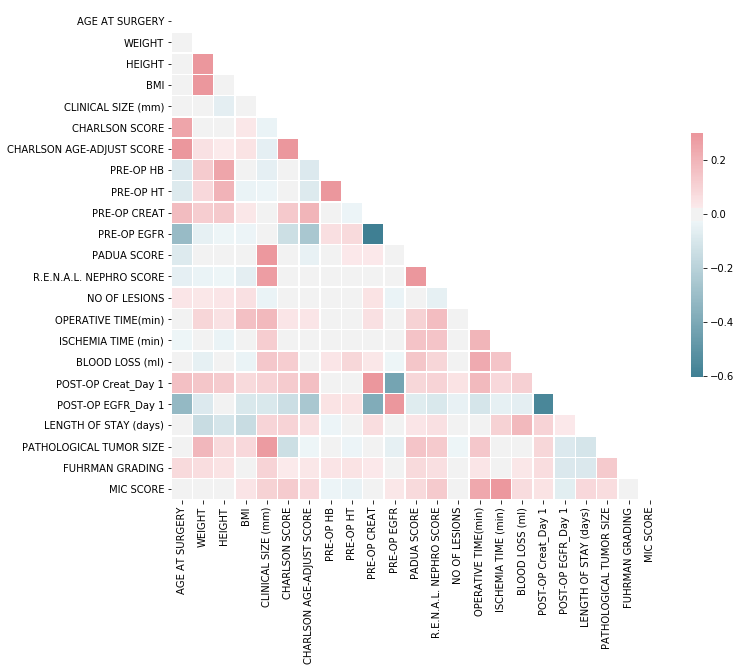

In [224]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [225]:
#need ot work from here
list(df2)

['PATIENT NUMBER',
 'PROC NAME',
 'CENTER CODE',
 'REC PROGRESS',
 'CREATED DATE',
 'GENDER',
 'AGE AT SURGERY',
 'WEIGHT',
 'HEIGHT',
 'BMI',
 'CLINICAL SIZE (mm)',
 'CHARLSON SCORE',
 'CHARLSON AGE-ADJUST SCORE',
 'SYMPTOMS',
 'SOLITARY KIDNEY',
 'SIDE OF TUMOR',
 'SIDE OF SURGERY',
 'FACE',
 'TUMOR lOCATION',
 'PRE-OP HB',
 'PRE-OP HT',
 'PRE-OP CREAT',
 'PRE-OP EGFR',
 'PADUA SCORE',
 'PADUA RISK',
 'POLAR LOCATION',
 'RIM LOCATION',
 'RENAL SINUS',
 'UCS INVASION',
 'EXOPHYTIC RATE',
 'CLINICAL SIZE GROUP',
 'CT',
 'CN',
 'CM',
 'R.E.N.A.L. NEPHRO SCORE',
 'R.E.N.A.L. NEPHRO RISK STRATIFICATION',
 'RADIUS (maximal diameter in cm)',
 'EXOPHYTIC/ENDOPHYTIC PROPERTIES',
 'NEARNESS OF TUMOUR',
 'ANTERIOR OR POSTERIOR',
 'DATE OF SURGERY',
 'ASA SCORE',
 'PARTIAL NEPHRO INDICATION',
 'NO OF LESIONS',
 'ACCESS',
 'ROBOTICS ARMS',
 'ASSISTENT TROCARS',
 'DUAL CONSOLE',
 'OPERATIVE TIME(min)',
 'ISCHEMIA',
 'CLAMP ARTERY',
 'CLAMP VEIN',
 'EARLY UNCLAMPING',
 'FLUORESCENCE',
 'ISCHEMIA TI

In [226]:
df_filter_intra_op = df2[['PROC NAME',
 'GENDER',
 'AGE AT SURGERY',
 'BMI',
 'CLINICAL SIZE (mm)',
 #'CHARLSON SCORE',
 #'CHARLSON AGE-ADJUST SCORE',
 'SYMPTOMS',
 'SOLITARY KIDNEY',
 'SIDE OF SURGERY',
 'FACE',
 'TUMOR lOCATION',
 'PRE-OP HB',
 'PRE-OP HT',
 'PRE-OP CREAT',
 'PRE-OP EGFR',
 'POLAR LOCATION',
 'EXOPHYTIC RATE',
 'CLINICAL SIZE GROUP',
 'CT',
 'CN',
 'CM',
 #'R.E.N.A.L. NEPHRO RISK STRATIFICATION',
 'RADIUS (maximal diameter in cm)',
 'EXOPHYTIC/ENDOPHYTIC PROPERTIES',
 'ANTERIOR OR POSTERIOR',
 'ASA SCORE',
 #'PARTIAL NEPHRO INDICATION',
 'NO OF LESIONS',
 'ACCESS',







'INTRA-OP COMPLICATION']]

In [227]:
df_filter_intra_op.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2833 entries, 0 to 2390
Data columns (total 27 columns):
PROC NAME                          2833 non-null category
GENDER                             2833 non-null category
AGE AT SURGERY                     2833 non-null float64
BMI                                2833 non-null float64
CLINICAL SIZE (mm)                 2833 non-null float64
SYMPTOMS                           2833 non-null category
SOLITARY KIDNEY                    2833 non-null category
SIDE OF SURGERY                    2833 non-null category
FACE                               2833 non-null category
TUMOR lOCATION                     2833 non-null category
PRE-OP HB                          2833 non-null float64
PRE-OP HT                          2833 non-null float64
PRE-OP CREAT                       2833 non-null float64
PRE-OP EGFR                        2833 non-null float64
POLAR LOCATION                     2833 non-null category
EXOPHYTIC RATE                

In [228]:
df_filter2 = df_filter_intra_op[df_filter_intra_op['INTRA-OP COMPLICATION'] != 'NA']

In [229]:
df_filter2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2387 entries, 0 to 2382
Data columns (total 27 columns):
PROC NAME                          2387 non-null category
GENDER                             2387 non-null category
AGE AT SURGERY                     2387 non-null float64
BMI                                2387 non-null float64
CLINICAL SIZE (mm)                 2387 non-null float64
SYMPTOMS                           2387 non-null category
SOLITARY KIDNEY                    2387 non-null category
SIDE OF SURGERY                    2387 non-null category
FACE                               2387 non-null category
TUMOR lOCATION                     2387 non-null category
PRE-OP HB                          2387 non-null float64
PRE-OP HT                          2387 non-null float64
PRE-OP CREAT                       2387 non-null float64
PRE-OP EGFR                        2387 non-null float64
POLAR LOCATION                     2387 non-null category
EXOPHYTIC RATE                

In [230]:
columns=df_filter2.select_dtypes('category')
df_filter2_codes = df_filter2.copy()
from sklearn.preprocessing import LabelEncoder
le_dict = {col: LabelEncoder() for col in columns }
for col in columns:
    le_dict[col].fit_transform(df_filter2_codes[col])

In [231]:
label_mapping = dict()


In [232]:
label_mapping = {col: dict(zip(le_dict[col].classes_,le_dict[col].transform(le_dict[col].classes_))) for col in columns}
label_mapping

{'PROC NAME': {'Partial Nephrectomy': 0},
 'GENDER': {'Female': 0, 'Male': 1, 'NA': 2},
 'SYMPTOMS': {'Absent': 0,
  'Local Symptoms': 1,
  'NA': 2,
  'Systemic Symptoms': 3},
 'SOLITARY KIDNEY': {'NA': 0, 'No': 1, 'Yes': 2},
 'SIDE OF SURGERY': {'Bilateral': 0, 'Left': 1, 'NA': 2, 'Right': 3},
 'FACE': {'Anterior': 0, 'NA': 1, 'Posterior': 2},
 'TUMOR lOCATION': {'Lower Pole': 0, 'Mid Pole': 1, 'NA': 2, 'Upper Pole': 3},
 'POLAR LOCATION': {'NA': 0,
  'Tumours crossing the sinus line >50% or falling entirely between the sinus lines (2 points)': 1,
  'Tumours entirely located above the upper or below the lower sinus line, or crossing the sinus line < 50% (1 point)': 2},
 'EXOPHYTIC RATE': {'< 50%exophytic (2 points)': 0,
  '= 50% exophytic (1 point)': 1,
  'Endophytic (3 points)': 2,
  'NA': 3},
 'CLINICAL SIZE GROUP': {'4.1cm-7cm': 0, '=<4cm': 1, '=>7cm': 2, 'NA': 3},
 'CT': {'NA': 0, 'T1a': 1, 'T1b': 2, 'T2a': 3, 'T2b': 4, 'T3a': 5, 'T3b': 6},
 'CN': {'N+': 0, 'N0': 1, 'NA': 2, 'Nx':

In [233]:
#df_filter2_codes = df_filter2
for col in columns:
    df_filter2_codes[col] = le_dict[col].transform(df_filter2_codes[col])
    

In [234]:
for col in columns:
    df_filter2_codes[col] = df_filter2_codes[col].astype('category')

In [235]:
#X = df_filter.drop(columns=['INTRA-OP COMPLICATION'])
X = df_filter2_codes.drop(columns=['INTRA-OP COMPLICATION'])
Y = df_filter2_codes['INTRA-OP COMPLICATION']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2387 entries, 0 to 2382
Data columns (total 26 columns):
PROC NAME                          2387 non-null category
GENDER                             2387 non-null category
AGE AT SURGERY                     2387 non-null float64
BMI                                2387 non-null float64
CLINICAL SIZE (mm)                 2387 non-null float64
SYMPTOMS                           2387 non-null category
SOLITARY KIDNEY                    2387 non-null category
SIDE OF SURGERY                    2387 non-null category
FACE                               2387 non-null category
TUMOR lOCATION                     2387 non-null category
PRE-OP HB                          2387 non-null float64
PRE-OP HT                          2387 non-null float64
PRE-OP CREAT                       2387 non-null float64
PRE-OP EGFR                        2387 non-null float64
POLAR LOCATION                     2387 non-null category
EXOPHYTIC RATE                

In [236]:
X.head(1)

,PROC NAME,GENDER,AGE AT SURGERY,BMI,CLINICAL SIZE (mm),SYMPTOMS,SOLITARY KIDNEY,SIDE OF SURGERY,FACE,TUMOR lOCATION,PRE-OP HB,PRE-OP HT,PRE-OP CREAT,PRE-OP EGFR,POLAR LOCATION,EXOPHYTIC RATE,CLINICAL SIZE GROUP,CT,CN,CM,RADIUS (maximal diameter in cm),EXOPHYTIC/ENDOPHYTIC PROPERTIES,ANTERIOR OR POSTERIOR,ASA SCORE,NO OF LESIONS,ACCESS
0,0,0,50.0,20.2,7.0,0,1,1,2,0,13.2,50.0,0.63,100.03,2,0,2,3,3,3,2,1,2,0,1.0,2


In [237]:
Y.head(1)

0    1
Name: INTRA-OP COMPLICATION, dtype: category
Categories (2, int64): [0, 1]

In [240]:
X_dummies = pd.get_dummies(X)

In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_dummies, Y, test_size=0.20, random_state=42)

In [266]:
from sklearn.preprocessing import StandardScaler
stdc = StandardScaler()
X_train_std = stdc.fit_transform(X_train)
X_test_std = stdc.transform(X_test)

H:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
H:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [267]:
X_train_std

array([[-1.06764986, -1.12120865,  4.79918235, ..., -0.69188054,
        -0.35812092,  0.88174113],
       [ 0.90918408, -0.30619929,  0.12906698, ...,  1.44533621,
        -0.35812092, -1.13411972],
       [-2.17467686, -0.32480681,  1.31216287, ..., -0.69188054,
        -0.35812092,  0.88174113],
       ...,
       [ 0.27659722,  0.14410268, -0.18227405, ..., -0.69188054,
        -0.35812092,  0.88174113],
       [ 0.03937715,  2.11649975, -0.18227405, ...,  1.44533621,
        -0.35812092, -1.13411972],
       [-0.27691628, -0.58159058, -1.24083353, ..., -0.69188054,
         2.79235295, -1.13411972]])

In [296]:
#PCA
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(X_train_std)
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
X_train_std_pca = pca.fit_transform(X_train_std)
X_test_std_pca = pca.transform(X_test_std)
print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  

[0.12027254 0.07227931 0.05283002 0.0457935  0.03879224 0.03687604
 0.03456298 0.03346454 0.03233176 0.02976244 0.02806835 0.02668178
 0.02520645 0.02364355 0.02202372 0.02089207 0.02051914 0.01924815
 0.01793783 0.01644579]
[131.22507741 101.72801784  86.97090091  80.9721216   74.52569334
  72.66172776  70.34596453  69.21911263  68.0374922   65.27814859
  63.39310556  61.80747543  60.07439956  58.18217075  56.15376857
  54.6920644   54.20173577  52.49622749  50.67789565  48.52449004]


In [277]:
# Kernel PCA
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA

transformer = KernelPCA(n_components=7, kernel='rbf')
X_train_std_KPCA = transformer.fit_transform(X_train_std)
X_transformed
X_test_std_KPCA = transformer.transform(X_test_std)

In [334]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import math
model = LogisticRegression()
parameter_dist = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'class_weight': ['balanced'] , 'penalty':['l2'] }
logit = GridSearchCV(model,parameter_dist,n_jobs=-1,scoring='balanced_accuracy', cv = 5)
results = logit.fit(X_train_std, Y_train)
logit.cv_results_
y_best_params_logit = logit.best_params_
y_best_score_logit = logit.best_score_
y_logit = logit.predict(X_test_std)

H:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [335]:
print(y_best_params_logit)
print("\n Model Accuracy: \n"+str(metrics.accuracy_score(Y_test, y_logit)))
print("\n Model Balanced Accuracy: \n" + str(metrics.balanced_accuracy_score(Y_test, y_logit)))

print("\n Classification Report: \n"+ str(metrics.classification_report(Y_test, y_logit)))
print("\n Confusion Matrix: \n"+str(metrics.confusion_matrix(Y_test, y_logit)))

{'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}

 Model Accuracy: 
0.7573221757322176

 Model Balanced Accuracy: 
0.7036507936507936

 Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.76      0.86       450
           1       0.15      0.64      0.24        28

   micro avg       0.76      0.76      0.76       478
   macro avg       0.56      0.70      0.55       478
weighted avg       0.92      0.76      0.82       478


 Confusion Matrix: 
[[344 106]
 [ 10  18]]


In [280]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import math
model = DecisionTreeClassifier()
parameter_dist = { 'max_features':["auto",'sqrt','log2',None],'max_depth': list(range(1,50)),
                  'min_samples_leaf': [10], 'class_weight' :['balanced']}  
classifier = GridSearchCV(model, parameter_dist, n_jobs = -1, scoring = 'balanced_accuracy', cv = 5 )
results = classifier.fit(X_train_std_pca, Y_train)
classifier.cv_results_
y_best_params = classifier.best_params_
y_best_score = classifier.best_score_
y = classifier.predict(X_test_std_pca)

In [ ]:
#import graphviz
#dot_data = tree.export_graphviz(classifier.best_estimator_, out_file=None, 
#                         feature_names=list(X),  
#                         class_names=['No','Yes'],  
#                         filled=True, rounded=True,  
#                         special_characters=True)  
#graph = graphviz.Source(dot_data)
#graph.render("H:\RediMinds\DRMahen/test")
#graph.write_pdf("H:\RediMinds\DRMahen/iris.pdf")


In [284]:
print(y_best_params)
print("\n Model Accuracy: \n"+str(metrics.accuracy_score(Y_test, y)))
print("\n Model Balanced Accuracy: \n" + str(metrics.balanced_accuracy_score(Y_test, y)))

print("\n Classification Report: \n"+ str(metrics.classification_report(Y_test, y)))
print("\n Confusion Matrix: \n"+str(metrics.confusion_matrix(Y_test, y)))

{'class_weight': 'balanced', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 10}

 Model Accuracy: 
0.7635983263598326

 Model Balanced Accuracy: 
0.6902380952380952

 Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.77      0.86       450
           1       0.14      0.61      0.23        28

   micro avg       0.76      0.76      0.76       478
   macro avg       0.56      0.69      0.55       478
weighted avg       0.92      0.76      0.82       478


 Confusion Matrix: 
[[348 102]
 [ 11  17]]


In [292]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import math
model = DecisionTreeClassifier()
parameter_dist = { 'max_features':["auto",'sqrt','log2',None],'max_depth': list(range(1,50)),
                  'min_samples_leaf': [5,10,20,25,30,35,40,45,50], 'class_weight' :['balanced']}  
classifier = GridSearchCV(model, parameter_dist, n_jobs = -1, scoring = 'balanced_accuracy', cv = 5 )
results = classifier.fit(X_train_std_KPCA, Y_train)
classifier.cv_results_
y_best_params_kpca = classifier.best_params_
y_best_score_kpca = classifier.best_score_
y_DTC_kpca = classifier.predict(X_test_std_KPCA)

In [293]:
print(y_best_params)
print("\n Model Accuracy: \n"+str(metrics.accuracy_score(Y_test, y_DTC_kpca)))
print("\n Model Balanced Accuracy: \n" + str(metrics.balanced_accuracy_score(Y_test, y_DTC_kpca)))

print("\n Classification Report: \n"+ str(metrics.classification_report(Y_test, y_DTC_kpca)))
print("\n Confusion Matrix: \n"+str(metrics.confusion_matrix(Y_test, y_DTC_kpca)))

{'class_weight': 'balanced', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 10}

 Model Accuracy: 
0.7259414225941423

 Model Balanced Accuracy: 
0.6032539682539683

 Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.74      0.84       450
           1       0.10      0.46      0.17        28

   micro avg       0.73      0.73      0.73       478
   macro avg       0.53      0.60      0.50       478
weighted avg       0.91      0.73      0.80       478


 Confusion Matrix: 
[[334 116]
 [ 15  13]]


In [285]:
feature_importances = pd.DataFrame(classifier.best_estimator_.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

ValueError: Shape of passed values is (1, 10), indices imply (1, 76)

In [ ]:
np.unique(y)

In [286]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import math
model = RandomForestClassifier(random_state= 42)
parameter_dist = {'n_estimators': [1,5,10,20,100,200,300], 'max_features':['auto','sqrt','log2'],
  'min_samples_leaf': [5,10,20,25,30,35,40,45,50], 'class_weight' :['balanced','balanced_subsample'] 
}  
classifier_RFR = GridSearchCV(model, parameter_dist, n_jobs = -1,cv=5, scoring = 'balanced_accuracy', return_train_score=True)
results = classifier_RFR.fit(X_train_std_pca, Y_train)


y_RFR_best_params = classifier_RFR.best_params_
y_RFR_best_score = classifier_RFR.best_score_
y_RFR = classifier_RFR.predict(X_test_std_pca)




In [287]:
y_RFR_best_score

0.7346306404851725

In [108]:
feature_importances = pd.DataFrame(classifier_RFR.best_estimator_.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
CN,0.351049
CM,0.139744
SOLITARY KIDNEY,0.077932
PRE-OP EGFR,0.073102
PRE-OP CREAT,0.066472
ANTERIOR OR POSTERIOR,0.056849
CLINICAL SIZE (mm),0.049200
GENDER,0.037070
FACE,0.033508
BMI,0.033417


In [288]:
print("\n Best Parameter \n"+str(y_RFR_best_params))
print("\n Best Model validation balanced accuracy  \n" + str(y_RFR_best_score))
print("\n Model Accuracy Score \n"+str(metrics.accuracy_score(Y_test, y_RFR)))
print("\n Model Balanced Accuracy \n"+str(metrics.balanced_accuracy_score(Y_test, y_RFR)))
print("\n Classification report\n "+str(metrics.classification_report(Y_test, y_RFR)))
print("\n Confusion Matrix\n"+str(metrics.confusion_matrix(Y_test, y_RFR)))


 Best Parameter 
{'class_weight': 'balanced', 'max_features': 'auto', 'min_samples_leaf': 50, 'n_estimators': 200}

 Best Model validation balanced accuracy  
0.7346306404851725

 Model Accuracy Score 
0.7803347280334728

 Model Balanced Accuracy 
0.6823809523809523

 Classification report
               precision    recall  f1-score   support

           0       0.97      0.79      0.87       450
           1       0.15      0.57      0.23        28

   micro avg       0.78      0.78      0.78       478
   macro avg       0.56      0.68      0.55       478
weighted avg       0.92      0.78      0.83       478


 Confusion Matrix
[[357  93]
 [ 12  16]]


In [308]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import math
model = RandomForestClassifier(random_state= 42)
parameter_dist = {'n_estimators': [1,5,10,20,100,200,300,400,500], 'max_features':['auto','sqrt','log2'],
  'min_samples_leaf': [5,10,20,25,30,35,40,45,50,60,70,80,90,100], 'class_weight' :['balanced','balanced_subsample'] 
}  
classifier_RFR = GridSearchCV(model, parameter_dist, n_jobs = -1,cv=5, scoring = 'balanced_accuracy', return_train_score=True)
results = classifier_RFR.fit(X_train_std_KPCA, Y_train)


y_RFR_best_params_kpca = classifier_RFR.best_params_
y_RFR_best_score_kpca = classifier_RFR.best_score_
y_RFR_kpca = classifier_RFR.predict(X_test_std_KPCA)


In [309]:
print("\n Best Parameter \n"+str(y_RFR_best_params_kpca))
print("\n Best Model validation balanced accuracy  \n" + str(y_RFR_best_score_kpca))
print("\n Model Accuracy Score \n"+str(metrics.accuracy_score(Y_test, y_RFR_kpca)))
print("\n Model Balanced Accuracy \n"+str(metrics.balanced_accuracy_score(Y_test, y_RFR_kpca)))
print("\n Classification report\n "+str(metrics.classification_report(Y_test, y_RFR_kpca)))
print("\n Confusion Matrix\n"+str(metrics.confusion_matrix(Y_test, y_RFR_kpca)))


 Best Parameter 
{'class_weight': 'balanced_subsample', 'max_features': 'auto', 'min_samples_leaf': 50, 'n_estimators': 300}

 Best Model validation balanced accuracy  
0.7291215507082168

 Model Accuracy Score 
0.7656903765690377

 Model Balanced Accuracy 
0.7248412698412698

 Classification report
               precision    recall  f1-score   support

           0       0.97      0.77      0.86       450
           1       0.16      0.68      0.25        28

   micro avg       0.77      0.77      0.77       478
   macro avg       0.57      0.72      0.56       478
weighted avg       0.93      0.77      0.83       478


 Confusion Matrix
[[347 103]
 [  9  19]]


f1=0.253 auc=0.186 ap=0.125


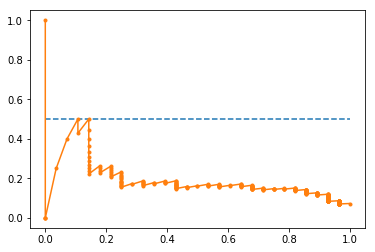

In [311]:
from matplotlib import pyplot
# predict probabilities
probs = classifier_RFR.predict_proba(X_test_std_KPCA)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(Y_test, probs)


# calculate F1 score
f1 = metrics.f1_score(Y_test, y_RFR_kpca)


# calculate precision-recall AUC
auc = metrics.auc(recall, precision)



# calculate average precision score
ap = metrics.average_precision_score(Y_test, y_RFR_kpca)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

In [114]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [ ]:
dict_unique = {col:list(df_filter2[col].unique()) for col in X.select_dtypes('category')}

In [ ]:
label_mapping_intra_op = {col: dict(zip(le_dict[col].classes_,le_dict[col].transform(le_dict[col].classes_))) for col in X.select_dtypes('category')}
label_mapping_intra_op

In [ ]:
numeric_intra_op = {col: "numeric" for col in X.select_dtypes('float64')}

In [ ]:
f = open("H:\RediMinds\DRMahen/label_mapping_intra_op.txt","w")
f.write( str(label_mapping_intra_op) )
f.close()

In [ ]:
f = open("H:\RediMinds\DRMahen/numeric_intra_op.txt","w")
f.write( str(numeric_intra_op) )
f.close()

In [ ]:
# open the file for writing
import pickle
#serializing our model to a file called model.pkl
pickle.dump(classifier_RFR, open("H:\RediMinds\DRMahen/model_intra_op.pkl","wb"))

# this writes the object to the open file


In [ ]:
#loading a model from a file called model.pkl
model = pickle.load(open("H:\RediMinds\DRMahen/model_intra_op.pkl","rb"))

In [ ]:
model.predict_proba(X_test)

In [ ]:
from platform import python_version
print(python_version())